In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [372]:
df=pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [373]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [374]:
df.rename(columns={'#Passengers':'Passengers'},inplace=True)

In [375]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [377]:
df.dtypes

Month         object
Passengers     int64
dtype: object

In [378]:
df['Month']=pd.to_datetime(df['Month'],format='%Y-%m')

In [379]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [380]:
df.index = df['Month']
del df['Month']
print(df.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [381]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Plotting Time-Series using Line plot:

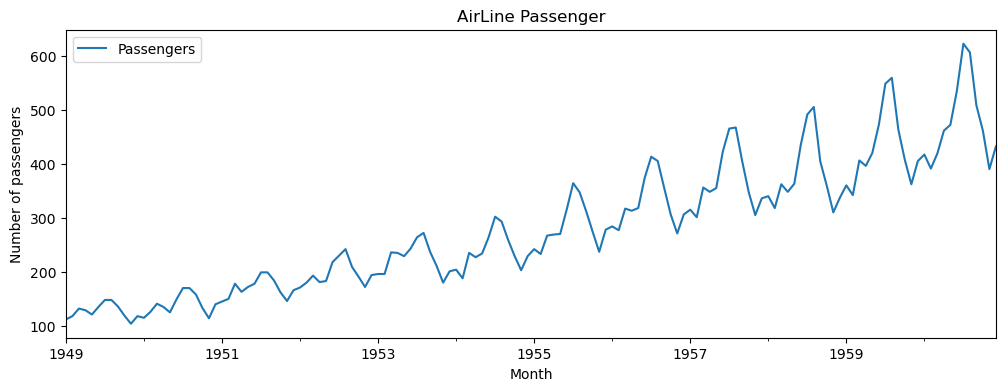

In [382]:
df.plot(figsize=(12,4))
plot.legend(loc='best')
plot.title("AirLine Passenger")
plot.ylabel("Number of passengers")
plot.show(block=False)

####  ---------> the plot tells that number of passengers increases w.r.t year

## Lets check if there are any Missing value in dataset

In [383]:
df.isnull().sum()

Passengers    0
dtype: int64

In [384]:
df.shape

(144, 1)

## Outlier Detection

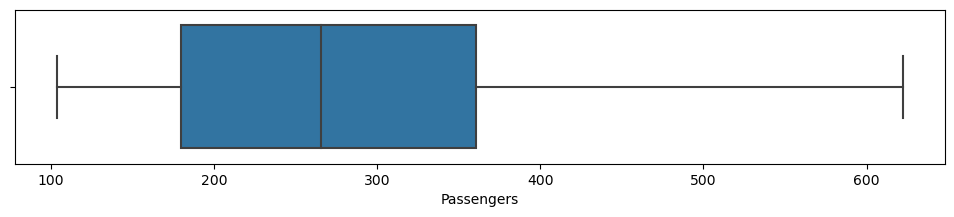

In [385]:
import seaborn as sns

fig = plot.subplots(figsize=(12, 2))
ax = sns.boxplot(x = df.Passengers, whis = 1.5)

#### ------> there are no outliers

## TimeSeries Decomposition

### Additive Seasonal Decompostion

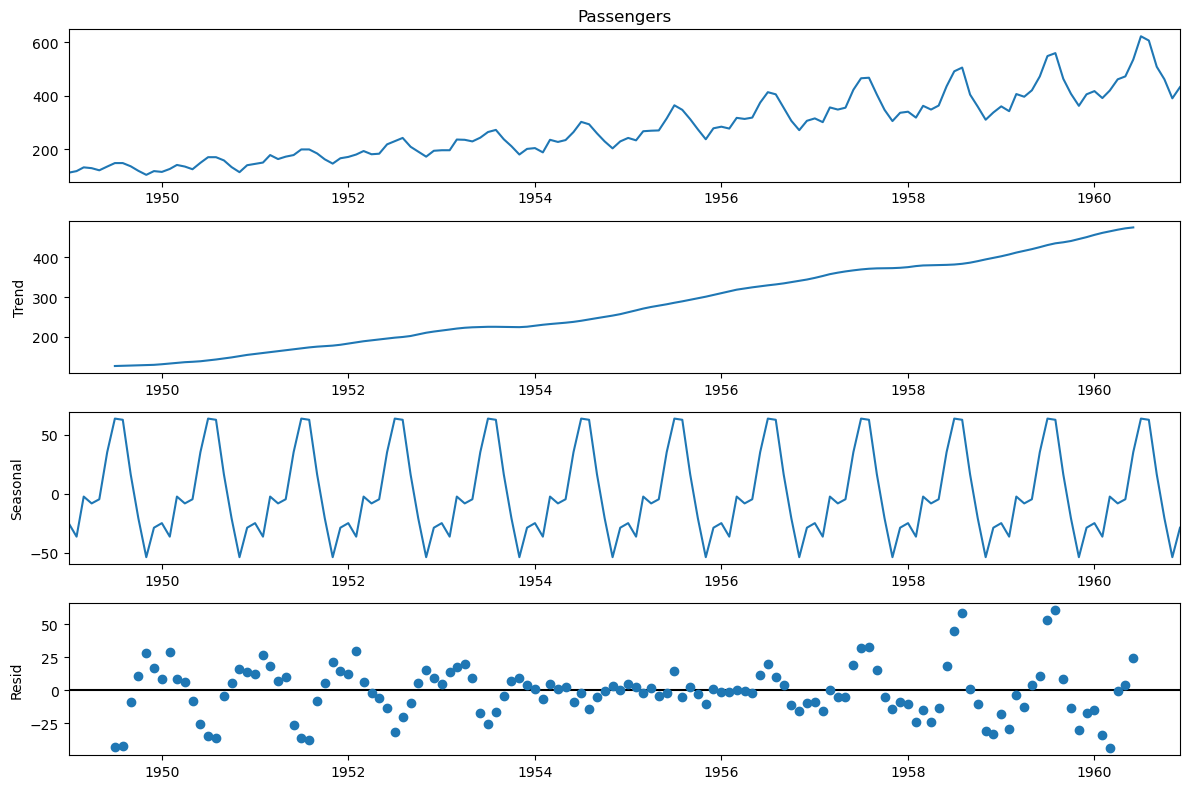

In [386]:
from pylab import rcParams
import statsmodels.api as sm

#rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(df.Passengers, model='additive')
fig = decomposition.plot()
plot.show()

### Additive Seasonal Decompostion

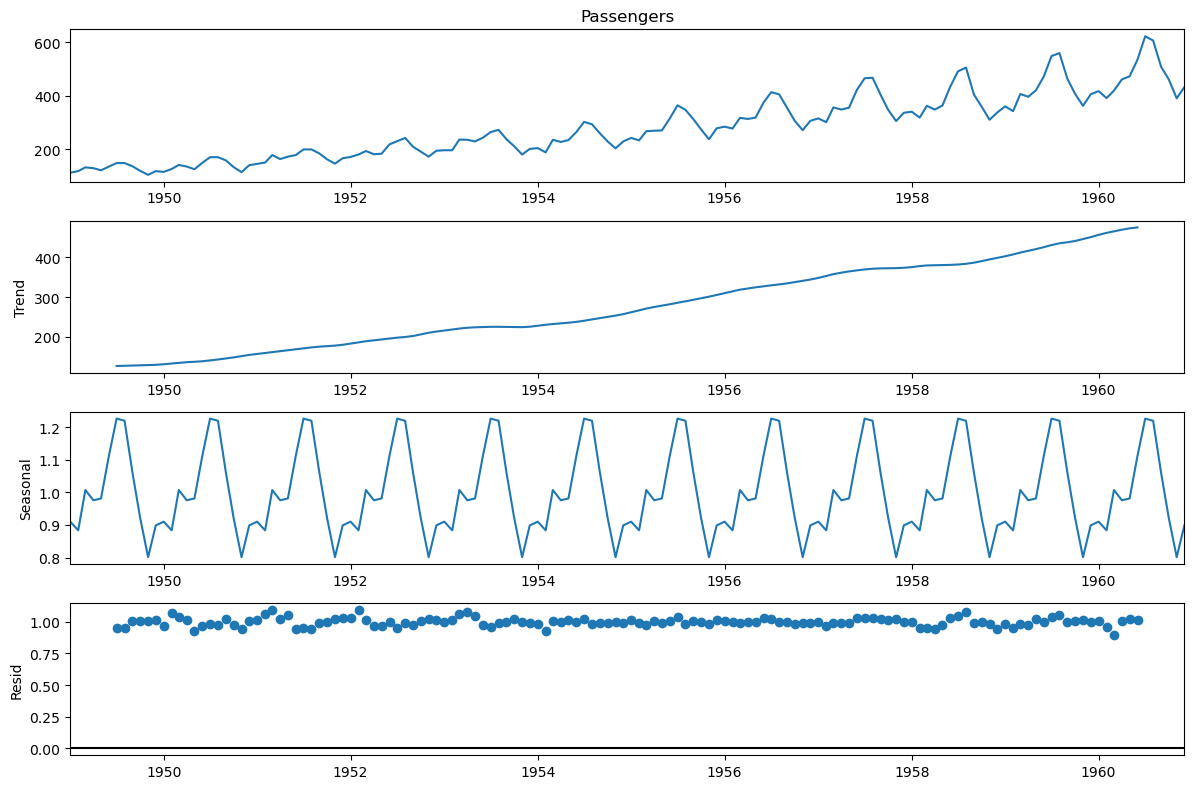

In [387]:
from pylab import rcParams
import statsmodels.api as sm

#rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(df.Passengers, model='multiplicative')
fig = decomposition.plot()
plot.show()

In [388]:
train_len = 120
train = df[0:train_len]
test = df[train_len:]

In [389]:
train.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [390]:
train.shape

(120, 1)

In [391]:
test.head()

,Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420


In [392]:
test.shape

(24, 1)

# Time-Series methods

## Navie's Method

In [393]:
def create_method(title, func):
    y_hat = test.copy()
    y_hat[title] = func
    return y_hat

In [394]:
# Navie method

y_hat_naive = create_method('naive_forecast', train.Passengers[train_len - 1])

In [395]:
y_hat_naive.head()

,Passengers,naive_forecast
Month,,
1959-01-01,360,337
1959-02-01,342,337
1959-03-01,406,337
1959-04-01,396,337
1959-05-01,420,337


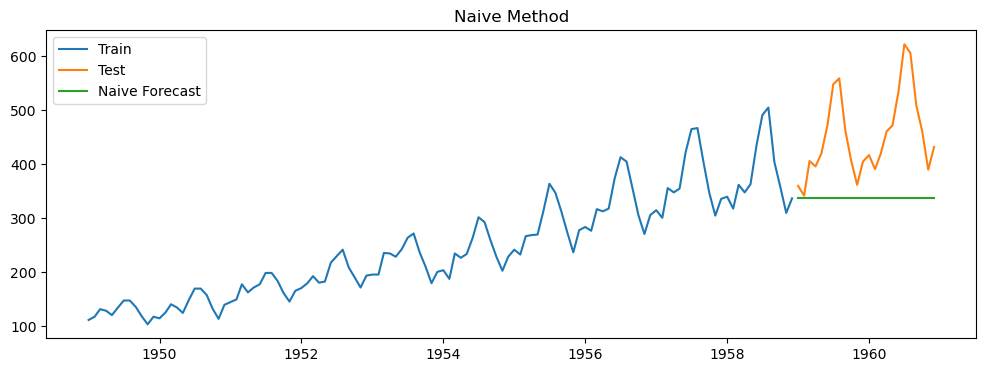

In [396]:
# Plot Train, Test and Forecast

def plot_method(y_hat, title):
    plot.figure(figsize=(12,4))
    plot.plot(train.Passengers, label = 'Train')
    plot.plot(test.Passengers, label = 'Test')
    plot.plot(y_hat, label = title + ' Forecast')
    plot.legend(loc='best')
    plot.title(title + ' Method')
    plot.show()
    
plot_method(y_hat_naive.naive_forecast, 'Naive')

In [397]:
# Calculating RMSE and MSE Values to decide which model is best fit 

from sklearn.metrics import mean_squared_error

def calculate_error(y_hat, title, prevResults, length):
    rmse = np.sqrt(mean_squared_error(test.Passengers, y_hat[length:])).round(2)
    mape = np.round(np.mean(np.abs(test.Passengers-y_hat[length:])/test.Passengers)*100, 2)

    results = pd.DataFrame({'Method':[title + ' Method'], 'RMSE':[rmse], 'MAPE':[mape]})
    results = pd.concat([prevResults, results])
    return results

In [398]:
results = calculate_error(y_hat_naive.naive_forecast, 'Naive', None, 0)
results

,Method,RMSE,MAPE
0,Naive Method,137.33,23.58


## Simple Average Method

In [399]:
y_hat_avg = create_method('avg_forecast', train.Passengers.mean())


In [400]:
y_hat_avg.tail()

,Passengers,avg_forecast
Month,,
1960-08-01,606,245.908333
1960-09-01,508,245.908333
1960-10-01,461,245.908333
1960-11-01,390,245.908333
1960-12-01,432,245.908333


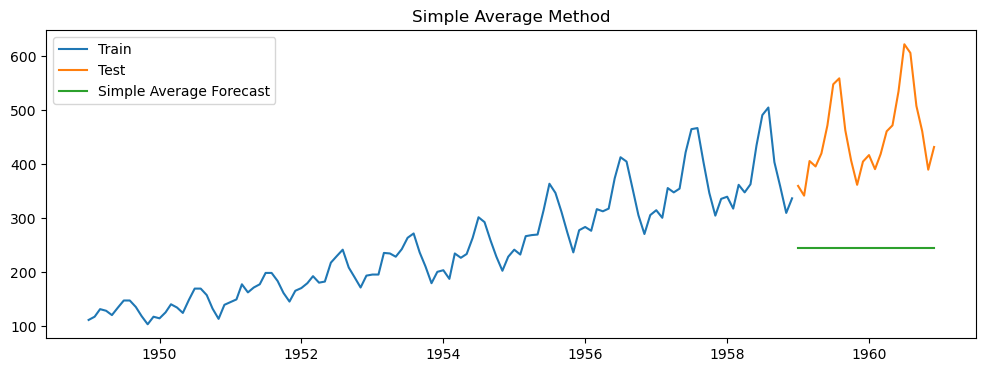

In [401]:
# plot train,test and Forecast

plot_method(y_hat_avg.avg_forecast, 'Simple Average')

In [402]:
# RMSE and MAPE Values

results = calculate_error(y_hat_avg.avg_forecast, 'Simple Average', results, 0)
results

,Method,RMSE,MAPE
0,Naive Method,137.33,23.58
0,Simple Average Method,219.44,44.23


## Simple Moving Average Method

In [403]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df.Passengers.rolling(ma_window).mean()
y_hat_sma.sma_forecast[train_len:] = y_hat_sma.sma_forecast[train_len-1]

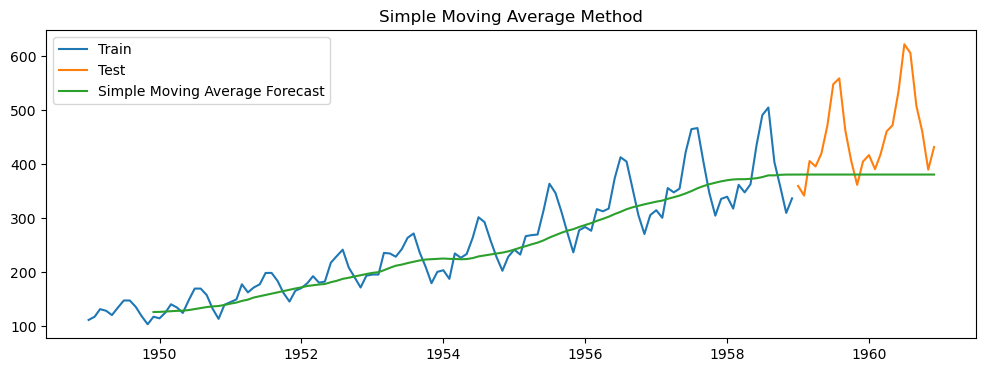

In [404]:
# plot train, Test and forecast

plot_method(y_hat_sma.sma_forecast, 'Simple Moving Average')


In [405]:
# Calculating RMSE and MAPE Values

results = calculate_error(y_hat_sma.sma_forecast, 'Simple Moving Average', results, train_len)
results


,Method,RMSE,MAPE
0,Naive Method,137.33,23.58
0,Simple Average Method,219.44,44.23
0,Simple Moving Average Method,103.21,15.47


## Simple Exponential Smoothing

In [406]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train.Passengers)
model_fit = model.fit(smoothing_level=0.2, optimized=False)
model_fit.params


{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [407]:

y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

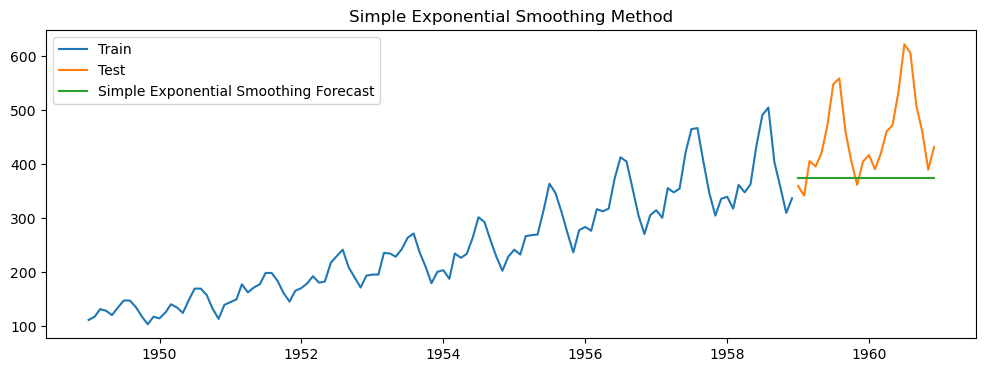

In [408]:
#plot Train,Test and Forecast

plot_method(y_hat_ses.ses_forecast, 'Simple Exponential Smoothing')


In [409]:
y_hat_ses.head()

,Passengers,ses_forecast
Month,,
1959-01-01,360,374.897322
1959-02-01,342,374.897322
1959-03-01,406,374.897322
1959-04-01,396,374.897322
1959-05-01,420,374.897322


In [410]:
# Calculate RMSE and MAPE Value

results = calculate_error(y_hat_ses.ses_forecast, 'Simple Exponential Smoothing', results, 0)
results

,Method,RMSE,MAPE
0,Naive Method,137.33,23.58
0,Simple Average Method,219.44,44.23
0,Simple Moving Average Method,103.21,15.47
0,Simple Exponential Smoothing Method,107.52,16.43


## Holt's Exponential Smoothing Method with Trend

In [411]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.array(train.Passengers), seasonal_periods=12, trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)

print(model_fit.params)



{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 118.4666666666666, 'initial_trend': 2.060606060606069, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [412]:
y_hat_holt = create_method('holt_forecast', model_fit.forecast(24))

In [413]:
y_hat_holt.head()

,Passengers,holt_forecast
Month,,
1959-01-01,360,386.846352
1959-02-01,342,389.042211
1959-03-01,406,391.238071
1959-04-01,396,393.433931
1959-05-01,420,395.629791


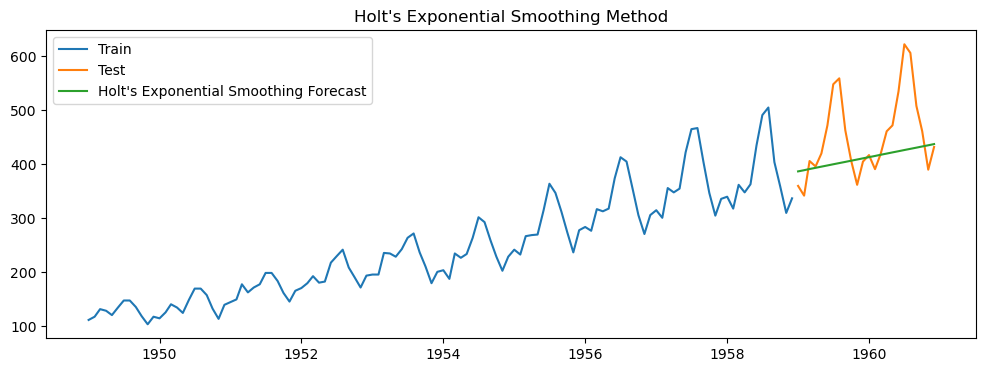

In [414]:
#plot Train,Test and Forecast

plot_method(y_hat_holt.holt_forecast, 'Holt\'s Exponential Smoothing')


In [415]:
# Calculate RMSE and MAPE value

results = calculate_error(y_hat_holt.holt_forecast, 'Holt\'s Exponential Smoothing', results, 0)
results

,Method,RMSE,MAPE
0,Naive Method,137.33,23.58
0,Simple Average Method,219.44,44.23
0,Simple Moving Average Method,103.21,15.47
0,Simple Exponential Smoothing Method,107.52,16.43
0,Holt's Exponential Smoothing Method,80.90,11.32


#### From the above Methods Holt's Exponential Smoothing Method is best model to choose for prediction

### 